Data Importing and Pre Processing

In [27]:
pwd

'C:\\Users\\Owner'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [73]:
df = pd.read_csv("C:/Users/Owner/Movie_collection_train.csv", header  = 0)

In [13]:
df.isna().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [14]:
df.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,392.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017180,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982812,7.813375,7.993887,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.723517,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.360000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,159.720000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,183.210000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


Analyzing Quantitative Variables

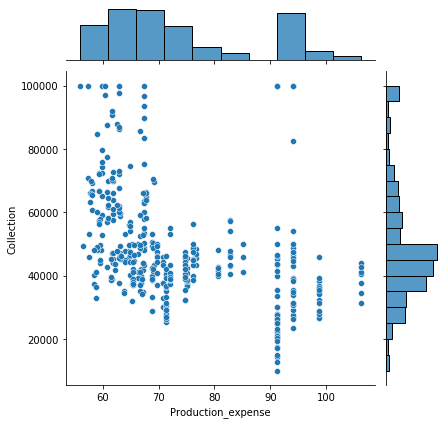

In [15]:
sns.jointplot(x = 'Production_expense', y = 'Collection', data = df)

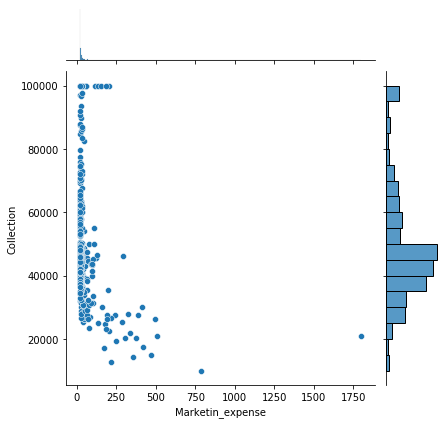

In [16]:
sns.jointplot(x = 'Marketin_expense', y = 'Collection', data = df)

In [20]:
df['Marketin_expense'].describe()
# We see there is an ipper outlier

472.1522199999998

In [29]:
df['Marketin_expense'].quantile(0.99)
df1 = df[df['Marketin_expense'] < df['Marketin_expense'].quantile(0.9)]
df1['Marketin_expense'].describe()

count    360.000000
mean      28.652196
std       14.373736
min       20.126400
25%       21.157350
50%       22.642000
75%       28.364250
max       96.994000
Name: Marketin_expense, dtype: float64

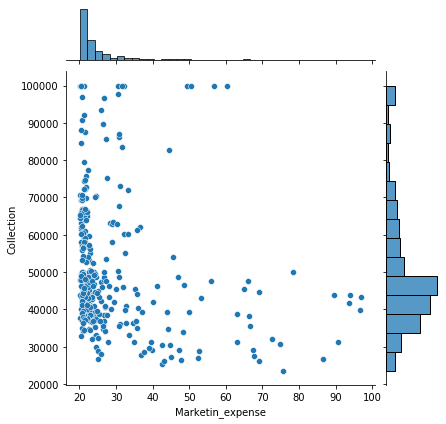

In [30]:
sns.jointplot(x = 'Marketin_expense', y = 'Collection', data = df1)

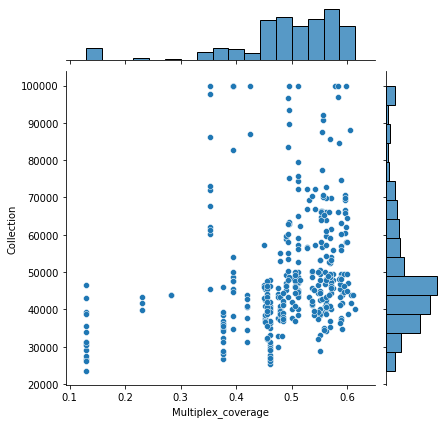

In [31]:
sns.jointplot(x = 'Multiplex_coverage', y = 'Collection', data = df1)

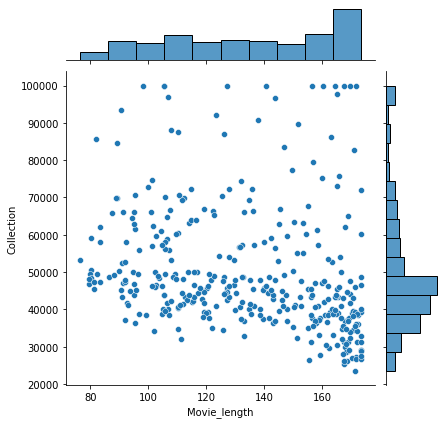

In [33]:
sns.jointplot(x = 'Movie_length', y = 'Collection', data = df1)

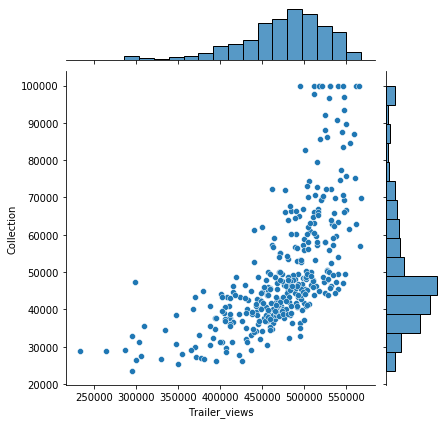

In [34]:
sns.jointplot(x = 'Trailer_views', y = 'Collection', data = df1)

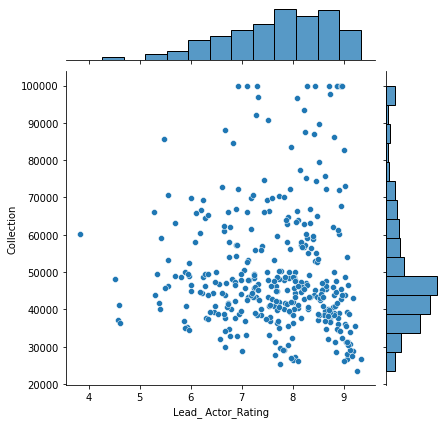

In [40]:
sns.jointplot(x = 'Lead_ Actor_Rating', y = 'Collection', data = df1)

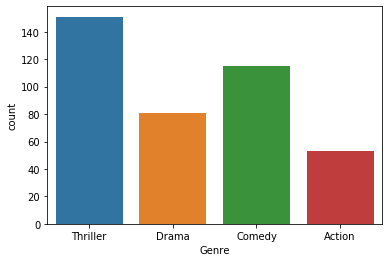

In [78]:
sns.countplot(x = 'Genre', data = df)

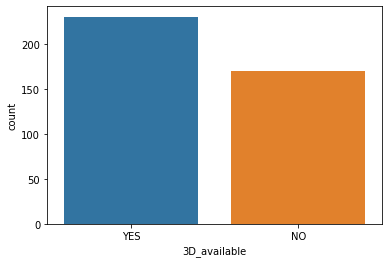

In [79]:
sns.countplot(x = '3D_available', data = df)

Missing Value Imputations

In [41]:
df.isna().sum()
#Time_taken has 8 null values and so we need to impute them

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [45]:
df['Time_taken'].describe()
sf_time_mean = df['Time_taken'].mean()
df['Time_taken'] = df['Time_taken'].fillna(sf_time_mean)

In [46]:
df.isna().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

Variable Transformation

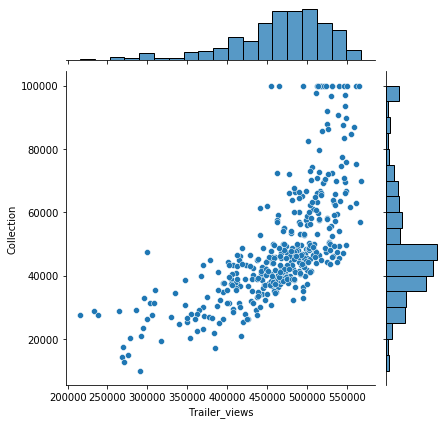

In [62]:
sns.jointplot(x = 'Trailer_views', y = 'Collection', data = df)
# We see that y is increasing exponentially with increase in input x, so we can transform the output variable to log

In [75]:
df1 = df
df1['Collection_1']= np.log(1+df1['Collection'])
df1['Collection_1'].describe()

count    400.000000
mean      10.725925
std        0.367300
min        9.210440
25%       10.540091
50%       10.714440
75%       10.942009
max       11.512935
Name: Collection_1, dtype: float64

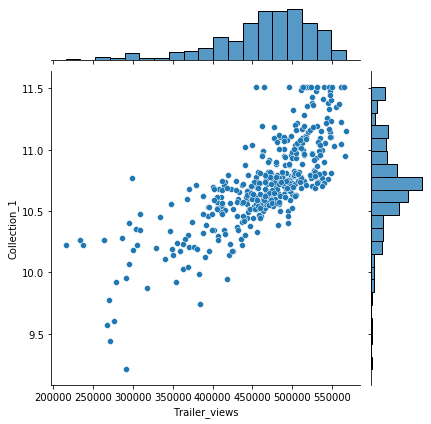

In [76]:
sns.jointplot(x = 'Trailer_views', y = 'Collection_1', data = df1)

Dummy Variable Creation

In [77]:
df2 = df1
df2 = pd.get_dummies(df2)
df2

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Avg_age_actors,Num_multiplex,Collection_1,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG,3D_available_NO,3D_available_YES
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,23,494,10.778977,0,0,0,1,1,0,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,42,462,10.673619,0,0,1,0,1,1,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,38,458,11.147657,0,1,0,0,1,1,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,45,472,11.109473,0,0,1,0,1,0,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,55,395,11.189975,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,26200,194.3350,91.20,0.307,35946.405,172.3,8.980,9.260,9.085,9.225,...,29,712,10.173553,1,0,0,0,1,1,0
396,25000,137.4410,91.20,0.307,35579.775,169.5,9.115,9.180,9.100,9.255,...,24,685,10.126671,0,0,0,1,1,0,1
397,17000,173.4404,91.20,0.307,31924.585,172.4,9.135,9.230,9.125,9.240,...,22,663,9.741027,0,1,0,0,1,1,0
398,10000,787.0360,91.20,0.307,30291.415,173.5,9.215,9.370,9.105,9.330,...,26,653,9.210440,0,0,1,0,1,1,0


Correlation Matrix

In [80]:
df2.corr()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Avg_age_actors,Num_multiplex,Collection_1,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,MPAA_film_rating_PG,3D_available_NO,3D_available_YES
Collection,1.000000,-0.265558,-0.373947,0.303971,0.754353,-0.278718,-0.110412,-0.109230,-0.105234,-0.112257,...,-0.005188,-0.272365,0.960930,-0.061967,-0.036113,0.020424,0.060124,NaN,-0.192355,0.192355
Marketin_expense,-0.265558,1.000000,0.351984,-0.377417,-0.167124,0.290087,0.321276,0.323924,0.319799,0.322379,...,-0.039713,0.337310,-0.405846,0.025279,0.052343,0.016341,-0.080096,NaN,0.065378,-0.065378
Production_expense,-0.373947,0.351984,1.000000,-0.747325,-0.403334,0.609577,0.668242,0.669666,0.668155,0.672624,...,0.028472,0.691225,-0.448535,0.044404,0.040700,0.016143,-0.082437,NaN,0.086836,-0.086836
Multiplex_coverage,0.303971,-0.377417,-0.747325,1.000000,0.314842,-0.714380,-0.749236,-0.750939,-0.748383,-0.749495,...,-0.078364,-0.914065,0.401988,-0.015216,-0.028551,0.008637,0.030138,NaN,-0.065540,0.065540
Budget,0.754353,-0.167124,-0.403334,0.314842,1.000000,-0.233983,-0.169458,-0.163343,-0.162799,-0.165340,...,-0.043350,-0.290950,0.723958,0.018271,-0.051806,-0.024516,0.055914,NaN,-0.167132,0.167132
Movie_length,-0.278718,0.290087,0.609577,-0.714380,-0.233983,1.000000,0.723420,0.724517,0.723945,0.725696,...,0.065164,0.655003,-0.369768,0.008192,0.075355,0.024897,-0.096724,NaN,-0.021640,0.021640
Lead_ Actor_Rating,-0.110412,0.321276,0.668242,-0.749236,-0.169458,0.723420,1.000000,0.998014,0.997846,0.994594,...,0.004379,0.686076,-0.207511,0.024349,0.014851,-0.016319,-0.017366,NaN,-0.005008,0.005008
Lead_Actress_rating,-0.109230,0.323924,0.669666,-0.750939,-0.163343,0.724517,0.998014,1.000000,0.998222,0.994557,...,0.008232,0.687844,-0.206395,0.026560,0.018377,-0.019332,-0.019707,NaN,-0.007657,0.007657
Director_rating,-0.105234,0.319799,0.668155,-0.748383,-0.162799,0.723945,0.997846,0.998222,1.000000,0.994754,...,0.009379,0.686856,-0.202371,0.025055,0.015712,-0.011240,-0.022875,NaN,-0.008954,0.008954
Producer_rating,-0.112257,0.322379,0.672624,-0.749495,-0.165340,0.725696,0.994594,0.994557,0.994754,1.000000,...,0.005637,0.687656,-0.209872,0.017084,0.023562,-0.012358,-0.023702,NaN,-0.013377,0.013377
